In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
auto = fetch_ucirepo(id=9)  # Auto MPG memiliki id 9
X = auto.data.features
y = auto.data.targets

In [3]:
# Hapus kolom 'car name' (string)
import pandas as pd
df = pd.DataFrame(X, columns=auto.data.feature_names)
df = df.select_dtypes(include=[float, int])
df['mpg'] = y
df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


In [4]:
import seaborn as sns
df = sns.load_dataset('mpg')
df = df.dropna()  # hilangkan baris kosong pada horsepower

In [5]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('mpg').dropna()

In [6]:
X = df[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']]
y = df['mpg']

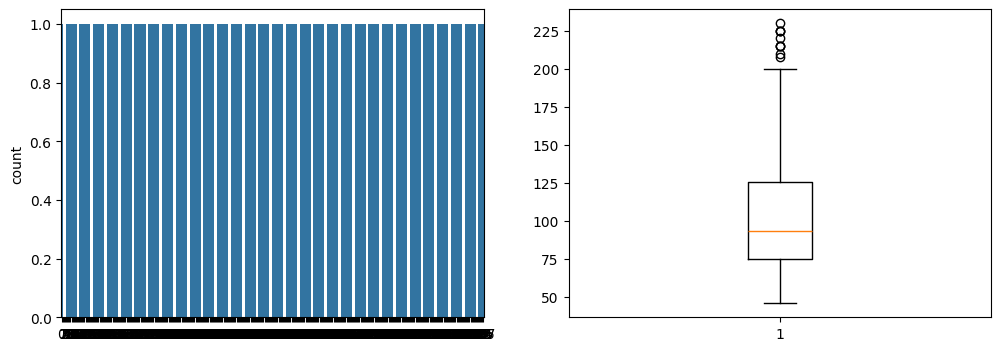

In [9]:
import matplotlib.pyplot as plt
#Univariate analysis bedrooms
#Melihat distribusi dari bedrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['horsepower'])

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

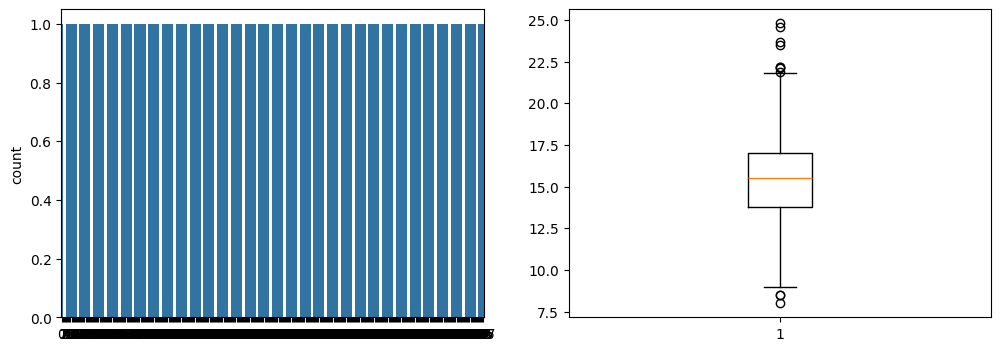

In [10]:
#Univariate analysis bathrooms
#Melihat distribusi dari bathrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['acceleration'])

f.add_subplot(1,2,2)
plt.boxplot(df['acceleration'])
plt.show()

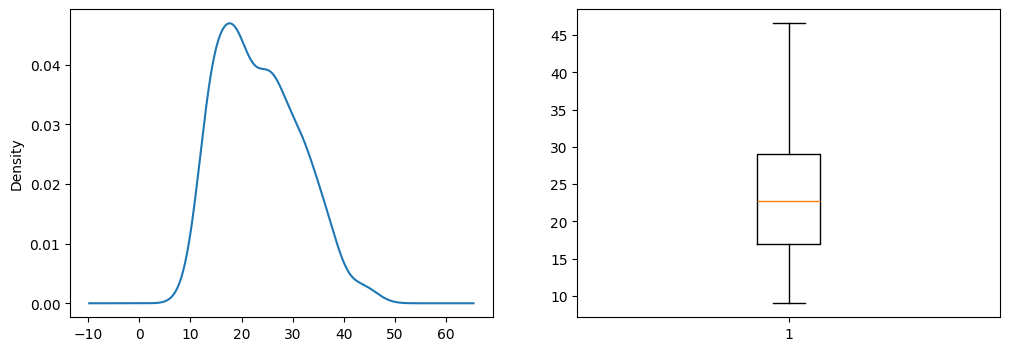

In [16]:
#Univariate analysis sqft_living
#Melihat distribusi dari sqft_living
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['mpg'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['mpg'])
plt.show()

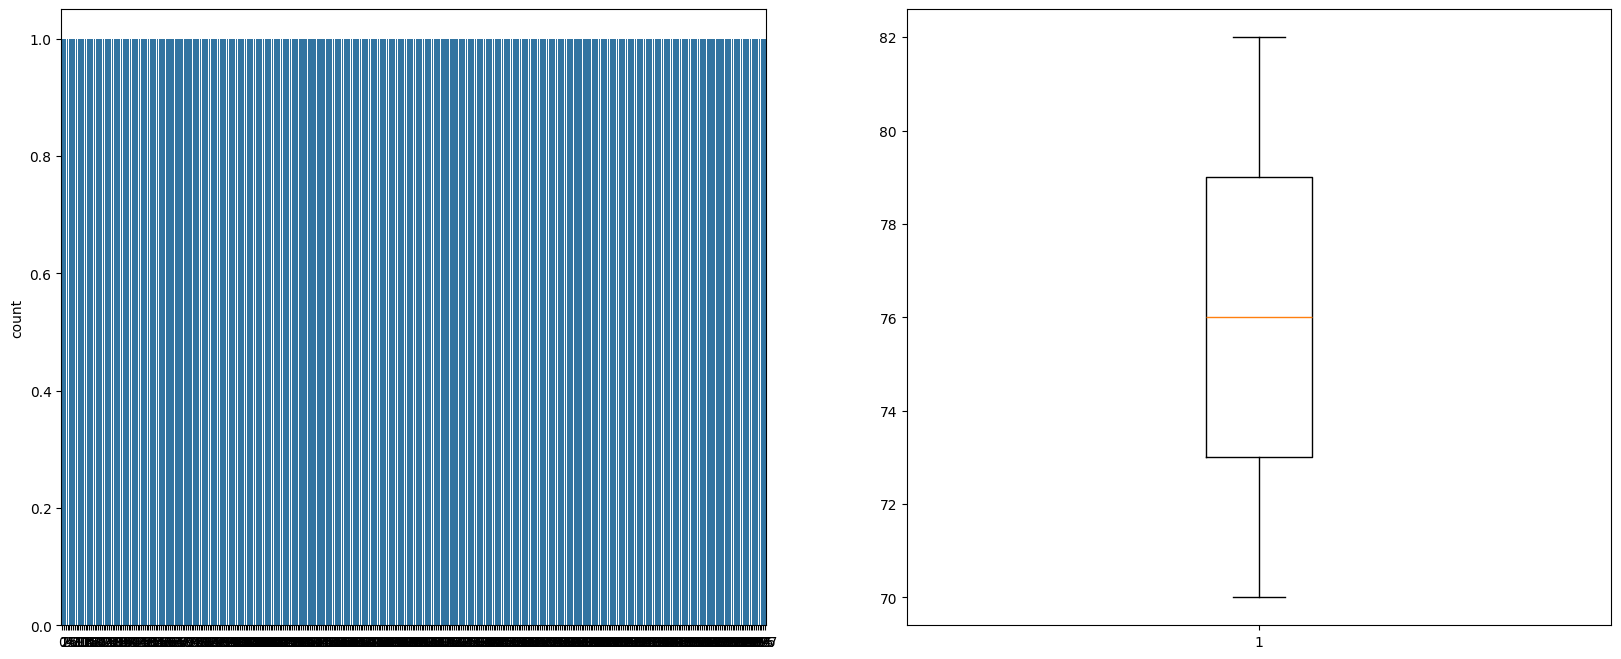

In [18]:
#Univariate analysis model_year
#Melihat distribusi dari model_year
f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
sns.countplot(df['model_year'])

f.add_subplot(1,2,2)
plt.boxplot(df['model_year'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

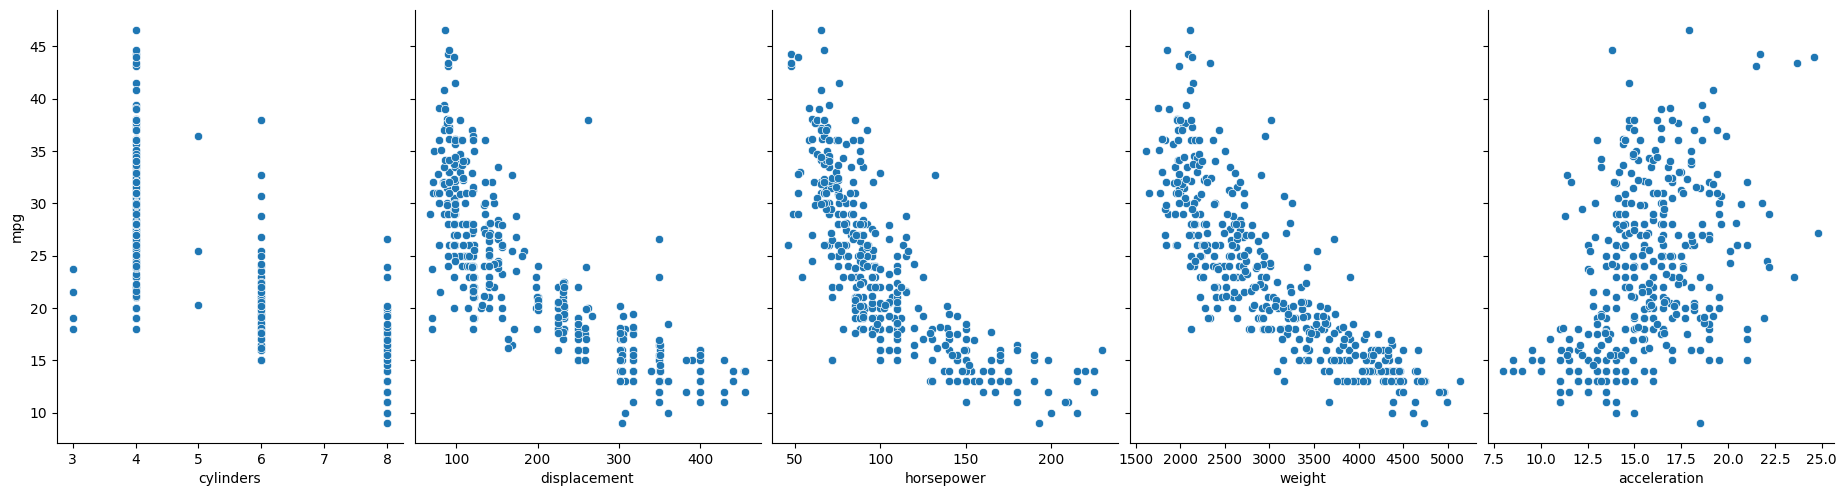

In [19]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], y_vars=['mpg'], size=5, aspect=0.75)
plt.show()

In [13]:
# Hitung korelasi
corr = df[['mpg','cylinders','displacement','horsepower','weight',
           'acceleration','model_year']].corr()

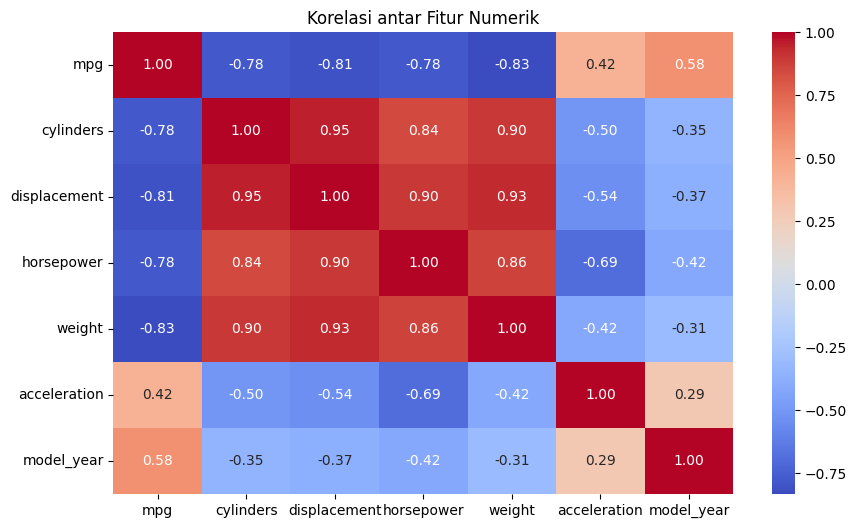

In [14]:
# Tampilkan heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Fitur Numerik')
plt.show()

In [20]:
#Recall data kita
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [23]:
#Pertama, buat variabel x dan y
x = df.drop(columns='mpg')
y = df['mpg']

In [24]:
from sklearn.model_selection import train_test_split
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [25]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(313, 8)
(313,)
(79, 8)
(79,)


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
# Ubah kolom 'origin' menjadi nama negara
origin_map = {1: 'usa', 2: 'europe', 3: 'japan'}
df['origin'] = df['origin'].map(origin_map)

In [39]:
# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=['origin'], drop_first=True)

In [41]:
X = df_encoded.drop(columns=['mpg', 'name'])
y = df_encoded['mpg']

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
#Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [48]:
# Buat model Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
# Ambil nama kolom dari data X
feature_names = X.columns

In [51]:
importances = rf.feature_importances_

In [52]:
# Gabungkan jadi DataFrame agar mudah divisualisasikan
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

/tmp/ipython-input-53-1844464151.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


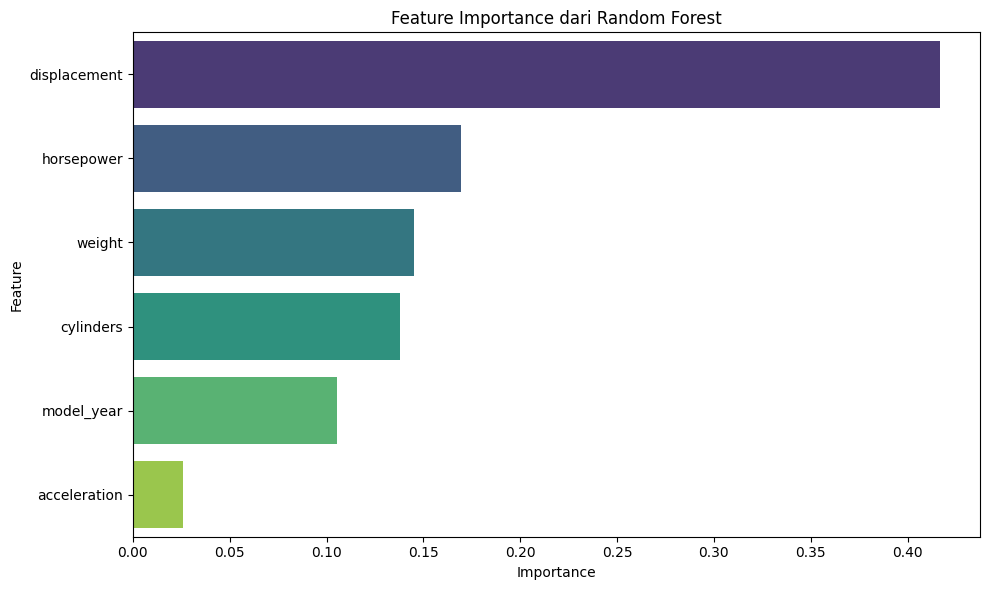

In [53]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance dari Random Forest')
plt.tight_layout()
plt.show()

In [54]:
input_data = [[4, 140.0, 90.0, 2500.0, 15.0, 82, 0, 1]]

In [56]:
print(X.columns.tolist())


['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [57]:
feature_names = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

In [59]:
import numpy as np
import pandas as pd

In [60]:
data_input = np.array([[4, 140.0, 90.0, 2500.0, 15.0, 82]])
input_df = pd.DataFrame(data_input, columns=feature_names)

In [61]:
input_scaled = scaler.transform(input_df)

In [62]:
predicted_mpg = rf.predict(input_scaled)

In [63]:
print(f"✅ Prediksi konsumsi bahan bakar (mpg): {predicted_mpg[0]:.2f}")

✅ Prediksi konsumsi bahan bakar (mpg): 30.06
